# Aragon Association


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://assets.website-files.com/5e997428d0f2eb13a90aec8c/5ea0200074850783b428f55a_graph02.svg")

# Findings for the the Vochain community board


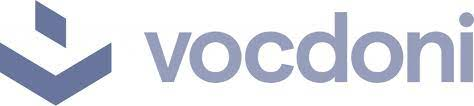

In [2]:
Image(url= "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBIREhgSEREYEhIRERIREhoYGhERERkSGBkaGRkVGRkcIS4lHB4tIRgYJzgmLC8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHxISHDQsJSQ/NDQ0MTE0NDQ0NDQ0MTQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQxNDQ0NP/AABEIAGoB2gMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABQYBBAcDAv/EAEAQAAIBAQQGBQoEBQQDAAAAAAECAAMEESExBQYSQWFxIlGBkbETMjNCUnJzobLRIzRiwRQWQ1OSB4KDwtLh4v/EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/8QAIhEBAQACAgICAwEBAAAAAAAAAAECEQMxEiEyURMiQWEz/9oADAMBAAIRAxEAPwDs0REBERAo+uOka1ntNNqLlT5HEZq3SbAjIyQ0LrbSr3JVuo1Dhifw2PBtx4H5yE/1C/MU/g/9mlUnox45ljNsXKyu2xOXaF1mr2a5SfK0hhssTeB+lt3LKX/ROmaFqW+k/SAvZWwdeY6uIwnLLC4rMpUnERMNEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQERNe2V/J02e7a2FLXX3X3br4HvErP81j+wf8//AJktonSP8ShfY2Lm2br9rcDfkOuW42dpuJGIiRSIiAiIgIiICIiAiIgJiZmpb7clBdtzwAGLE9QESbG1Er9DWamzXMjIpPnYMBzA/wDcnQ4OIOEvjYm3pExEisxMRA57/qF+Yp/B/wCzSqS4/wCoFlc1EqhSaa09lmGIB2ibj1ZiU6evj+McsuyfdKoyMHRirKb1KkqwPAifETojq+rFretZUqVDtO22CbgL9l2UHDgBJaQWpv5Kn/yfW0nZ4cu66zpmJiJFZiYiBmJiIGYmIgZiYiBmJiIGYmIgZiYiBmJ5tUVc2A5kCZVwciDyIMD7iYiBmJiIGYmJ8NUUZsBzIED0ifCsDkQeWM+oGYmIgZiYnwzquZA5kCB9zS0x+XqfDbwm0jg5EHkQZq6Y/L1PhP4Szsc/lu1Q9E/xD9Kyoy3aoeif4h+lZ25PixO1giYicG2YnwzAZkDnhMLUU5MDyIMD0iYiBmJiIGYmIgZieXlkvu2hfzF89ICVPW8NtoT5uyQOravx+WzLZNa2WSnWXYddoZjcQesHcZcbq7SzbncnLPStmwuztbOyuzn5t2El6GrlBW2jtNcbwGIu7bgL5Mzpc5/E0zEqWhdcadS5LQBSfLa/pHn7HbhxlrUgi8G8HHhOdlx7WXb7mIiRXywBwIvBw4Sqaa1Op1L3sxFJ8yv9Njw9g8sOEt0xLjlZ0lm3GrdYqlB9iqhRuORHWpyI5TXnY7bYqddNiqgdTuO49YOYPESj6a1Oene9mJqJmUPpBy9rx5z0YcsvbFx0supv5Kn/AMn1tJ2Qep4IsVMEXEeUBBwIO22BEnJ58u63OiImZFYifDuFBZiFAF5JIAA6yd0q2kNb0FRaVnHlCaiKzm8IAWAOyM255c5ZLekt0tsxMzEikTMQKDpek1KsyBm2b9pcT5rYj7dk9tXrWVtChmJVwUN5JxOI+YHfJPW2y3qtUDzTsNyOIPff3ysI5UhhgVII5jET0Y/tixfVdLmZ4WWsKiK4ydQ3eMotVYU0Zzkilu4Tz6bU7WG1lrQwViFQBBcSMRifmT3Tw0TTerWRNprtrabE+auJ+3bNJ3LEscSxLHmcTLJqpZwqvXbAeaD1KOkx8O6ei/rix3U1pHSCWdNpzicFUecx6h95UrbputVPnbC7lXDvbMzX0jbWr1C7ZZIOpdwnxYbG9dgiDHMk5AdZkxxmM3Vt212N+JxPHGZRipvUkHhgZb7PqzRUdMtUO/HYXsA+8+LXqzTYfhMUO4E7S/cR+TFPGoqwawVaZAc+UXeG88Dg33ltslqSsgdDeD3g9RG4zn9ooPTcow2WU3EfuOE3tB280KovPQqEK43cG7PC+TLCWbiyr1I/SmlEs63tizeaozPE9Qm5XqqiF2yVSx5Cc8tlpaq7O+bHsA3KOAmMMfJbdNm26XrVT0nKr7K3qv3PbNAzasFhau+yvNiclXrMtFDVqgo6W053m/ZHYBOtyxxZ1ap6Oym9SVPWCQflJnR2sNRCBV/ETefXHEHf2zd0hq0uyWoEhgL9ljeDwB3GVgi7A4EYHnE8c4e46RRrK6hkO0rC8ERWrKilnNyqLyTKvqpbCHaiT0WBZeDDMDmPCZ1rtpLiipwQBn4scgeQx7Zy8P201v019I6wVKhK0yaabrvPPEndyEhnYsb2JJ6ziZiWXR2rYKhq5IJx2Vwu5nr4Tr+uEZ91XEcqb1JU9YJB+UlaWm3NJqVU7YZGVW9YG7AHrHzk7U1bs5FwDKesMf3vlb0rotrOwvO0jea2WPURuMkyxyXViPlu1Q9E/wAQ/SsqMt2qHon+IfpWOT4pj2mq9daalnOyqi8kyp6R1iqOStL8NOv1z27uzvnzrLbzUqeTU9Cmbub7z2Zd8iKaF2CqNpmIAAzJkwwmt1bWHdmN7MWPWSSfnPkcJa7FqygANZizb1U7KjhfmflPetq1QYdHaQ7iCT3gy/kxTxqu2PTFekcHLL7L3sv3HZLbovSiWhb16LL5ynMcR1jjKdpHR72d9l8QcUYZMPvwnjZLQ1J1dDcVN/Ajep4GMsJlNxZdOgWz0b/Df6TOeCq3tt3mX6pXWpZy6+a9JmHapnPhM8f9Mk5oXSgoU6jOS7FkCLfiTce4SPtmkqtY3u5u3KOig7PvNVELEKovZiAAMyTulnserKBQazEscwpuUcL8zNXxxu6nuqtdN6xaUq0SNhyV3q15Q9m7sk1b9Wl2S1Fm2gL9lriDwB3GVcialmUOnQtHW5bRTDrhuYbw3VInW5iES4kdM5XjdNDVSuVrFNzof8lxB7r5va3+jT3z4TlMdZaXe4q/lW9pu8y/6OP4NP4VP6ROezoOjfQU/hU/pE1yJHHpLaH0/XspuVtunvRryv8AtPqnl3SJieiyX1WHVND6wULULkbYqb0a4N2bmHL5SZnE1JBvBuIN4IwIPWJadC641KdyWgGqmW2PSDn7XjxM8+fD/cW5l9uiRNSxW2nXTbpOHU9WYPURmDwM25xbIiIGJmJo6Q0lSsy7dZwo3DNiepRmYk2N2QemdZKFmvW/ylX2FIwP6j6vjwlU01rdVrXrQvo08r/6rDifV5DvlZnbDh/tYuX0ktLabr2o/iNcl96ot4Qcx6x4malh9Knxaf1CeE97D6VPi0/qE76kmow7PERPE7MTMRA1NIWcVaTUz6ykDnmD3gTnpBBuOBBuPOdMlH1js3k67EDo1OmOZ87539868d/jNTeqlo2qJQ502N3utiPntRrXaNmiEGdRsfdXE/PZkNqzaNiuFOVRSvbmPC7tjWa0bdcqMqahe3M+N3ZHj+5v0iQL8BiTgOct+kaf8PYdgZ7KoebHpfvIPV6zeUtC3+bT/EPZl8yO6WLWZb7M3BlJ5X3fvLnf2kJ0pMuGqtALRL76jH/FcAO+/vlPl11YqBrMoGasynvv8CJeT4pj2mJmInBtWNbrOLkqAY3lG4jMeB75WJbNbqgFNF3s+12KCP8AsJU53w+LF7WvStqLWFW31BTU88z9Mqksuk6RFgp/p8mx7Qf/ACErUvH0VcdVaAWhtb3YnsGAHj3yckRqy4azKPZLKe+/wIkvOGXyrU6JFVNA0GdnYFi7FiLyFvOeUlpgGSWzpWrZ7DSp4pTVT1gdLvOMo+k6m1XqN1uw7Abh4ToU51b1uquOqpU+ozrx91nJu6uWcPaFvF4QGp2jL5kd0vMpWqzhbRcfXRlHPA/sZdZnk7MemJo6Ys4qUHU5hSw5riPCb017fUCUnY7kc/IzE7ac6lr1XfZs9RvZdj3KDKoJaNW02rLVUZszjvQCd8+mJ2rDMSSTmSSeZk/qlZw1RnPqKAvNr8e4fOV8Sy6n1BfUXeQjDkLwfES5/Gk7WmJiZnnbROsdnD2djvS517M/lfKPL7pyoFs9QnemyObYfvKFO3H0zktegau1Y3U+p5VRyK7X7mVQS0avJdZap6zUu7EEq8uHdSp3VOzhqrOf6a4e82F/cDLhK1qeMKnOn4NLLOed/ZqdE59pZQLRUAy8o3zxnQZQNM/mKnvmXi7SvfVv80nJ/pMltb/MT3z4SJ1b/NJyf6TJbXDzE98+E3l/0hOlUnQdG+gp/Cp/SJz6dB0b6Cn8Kn9Ik5Ejj0TpGmtU6NoveldRqnHAdBj+pd3MfOUPSOja1mbYrIRf5rZo3utv8Z1w5Jl0zcbGnEROiNix22pQfbpOUYbxkR1EZEcDLvoTXGnUuS0gUmyDD0Z5+z4cZQImMsJl2stjtasCLwbwReDmLp8u6qCzEKALySQAB1knKcr0Pp6vZTcjbVO/FGvK/wC32TynnpbTVe1H8RrlBvVVwQdm88TOP4btvyWrTWuarellAdsi7ejHuj1ueXOUm1Wl6rl6jl2OZY3nkOocBPKJ2xwmPTFtpERNoT3sPpU+LT+oTY0XoitamupJeAbmc9FF5n9heZftCar0bNc7fi1RjtMMFP6V3c85zz5JisxtWGIieR1IiIGJBa1WXbpBwMabY+62B+d0np5V6QdWQ5OpU8iLpcbq7Suc0nKMHXNWDDmDfFVy7MzZsxY8ybzM16RR2Rs1YqeYN0xRpl2VF852CjmTdPT/AKwtmqll2aRcjGo2HurgPnfJe10BURkOTqV5X5GfVnpBEVBkqhR2Ces81u7tuRzWtSZGKMLmUlTzEkdB6T/h3IbGm121dmCMmEndOaG8t00uFQC4jIMBu4HjKjVpsjFXUqwzBFxneWZxnp0ShaUqC9GVhwIPf1T4tVtp0he7heHrHkMzOdiJn8X+r5N3S1vNoqbRFygbKDqXjxM8rDZjWqKi+sceC7z3T5s1meo2wilmPVu4k7hLlobRQoLebmqMOkdwHsjh4y5ZTGaSTbat9kFSi1MYXrcvUCPN+YE586kEgi4gkEbwRmJ0yV3T2hTUJq0h0/WXLa4jj4+OMMteqtiK0DpP+HchvRvdfdiVbcbvGXKjXRxejBgd4IM5wykEgggjAg4EHiJgTeWEy9kul/0hpKnQUlmBN2CgjbJ5buco1S0uzs+0VdmLEqSufKeM97JZHrNsIu0d/sjiTulxxmKW7TurVqr1KhDVGamikttXHE4KLzj1nsmnrNZilcvd0ag2h7wwYeB7ZZ9F6PWz09kYscWPWftM6TsC16ZQ4EYqepvtOflPLa69KHRqsjKym5lIYcxLxo3S1OuouYK+9SQDfw6xKVbLI9Fth12Tu9kjrB3zwnTLGZJLp0p6iqL2YAdZIA75VtYNMrUHkqRvW+923G7IDhxleJnvZ7K7hmUdFFLOdwAGXPhM44Se6tu3hLdqh6J/iH6VlRlu1Q9C/wAQ/Ss1yfFJ2r+mbGaNZlu6LHbT3Tu7MR2Ty0fbGoVA643YEbipzEuultHLaEuODLijdR6jwMpNssb0W2ailTuOaniDvkxymU1Vs0vNi0jSrC9GF+8G4MOYmxVrKg2nYKBvJAE5tBk/FPs8k1p/SwrkIno1N9+W03Xd1SGVSSABeSQAN5JyEyiFiAoJJwAGJPIS06C0IaZFWqOl6q57PE8fDw1bMInaQoWXyNlKbxScn3iCT8zKIJ0a2+jf4b/SZzmZ4rva5LRqdlU5p4GWWVrU7KpzTwMss55/KrOiUDTP5ip75l/lA0z+Yqe+Zri7SvfVv80nJ/pMltcPMT3z4SJ1b/NJyf6TJbXDzE98+E1l84TpVJ0HRvoKfwqf0ic+nQdG+gp/Cp/SI5EjdnjaLOlRSlRQ6nMEAie0Ti2ommtSyt72U7QzKMekPcY58j3yn1EZGKupVlNzAgqwPUQZ2qRultDULUt1RekBcrDBx27xwOE64c1nqsXH6ckiTmmtWq9lvYDytIesoxA/Uu7nlIOemWWbjFmiIiUIiWHQuqta0XO99GkcbyOmw/Sv7n5zOWUnukm0DQou7BEUu7YAKCSZdNC6l5PajfvFNTh/uYZ8h3yzaM0TRsy7NJLifOY4u3M/tlJCefPlt9RuY/bzo0lRQqKFVRcAoAUDgBPWInJsiIgIiICIiBG2jQ1nqOXdL2N152nGQuyB4RZ9DWemwdKdzDEHac7rsieMkYl3ftNMxESKTWtNkp1RdUQON14xHI5ibMQIV9W7OctteTX/AFAzNLVyzLmGf3mP7XSYiXyv2mo8qFBKYuRQg6gAJ7REikREDUtVgpVfSUwx68m7xjI59WrOci68mB8QZNxLMrOk0h6WrtnXNWf3mPgLpKUaKoNlFCqNwAAnpEW29qzERIPKtRVxsuoZeogESLq6uWZsgy+6xu+d8mIlls6ENS1cs6m8hn944fK6SRsqbBp7ACEEFRgLjnlPeIttTSK/l+y/2z/lU+83LFY6dEFaa7IJvOJbHLfymzEltv8AVZnnVpK42WUMpzBAInpECHrau2dsQrL7rG7uN8+E1as4z225sAPkBJqJfK/aajWslhpUvR0wvHNu0nGbURIr4dQwKnEMCDyOEjP5fs39s/5VPvJaYjdnQ1LFYKdC8Ul2dq6/FjllmeM25mIt2MSNr6Fs7sXenezG8nacY9hknMRuzoR9m0RQpOHRLmW+47THMXHAme1ssNOuAKi7QU3jEjHsM2ojdEV/L9m/tn/Kp95I0qQVQqjBQFHIYCekzLuhERIEREDErGm9UqVe96V1GoccB+Gx4qMjxHcZZ4lxysvpLHHdIaNrWdtmshU+qc1birb596L0TWtTbNJLwDczHBF5t+wxnUtJ0lek4dQw2ciAwy6jPayU1RFVFCqFFwACjLqE7fmumfH2hNCaq0bPc7/i1RjtMOip/Sv7nHlLFEzONtvbUmiIiRSIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIH/2Q==")

In [3]:
from _utils.voc_const import *
from _const import *
from datetime import timedelta
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'iframe_connected'

from _utils._analysis import *
from _utils._mongo import get_df_processes, col_envelopes, get_df_envelopes

In [4]:
# if CACHE_ENVELOPES:
#     from data.rs import rs as envelopes
#     print(len(envelopes))
#     print(envelopes[4])
    
#     ### Filter needed data from `envelopes`
#     check = []
#     envelopes_filtered = []
#     for e in envelopes:
#         r = e.get("response", None)
#         _e = r.get("envelopes", None)
#         if _e:
#             l = (len(_e))
#             for _d in _e:
#                 new = {attr: _d[attr] for attr in ATTR.getEnvelopeList if attr in _d}
#                 envelopes_filtered.append(new)
#             if l == 64:
#                 check.append(new["process_id"])
                
# #     col_envelopes.insert_many(envelopes_filtered)

In [5]:
# Load datasets
df_processes = get_df_processes()
# df_processes, MIN_KNOWN_DATE = add_time_cols(df_processes, AVG_BLOCK_TIME_SECS)
df_envelopes = get_df_envelopes()

In [6]:
df_processes.shape, df_envelopes.shape

((168, 6), (30544, 4))

In [7]:
### Estimate timestamp for every envelope
# df_envelopes["vote_ts"] = (df_envelopes["height"]  
#                            / AVG_BLOCK_TIME_SECS # seconds
#                            / 60 # minutes
#                            / 24 # days
#                           ).apply(lambda x: timedelta(days=x)) + MIN_KNOWN_DATE

In [8]:
df_processes.head()

,_id,creationTime,endBlock,startBlock,entityId,processId
0,60bb9aaee8dd77bc92a17b90,2021-05-12T15:23:16Z,541,41,359e67ac4c5311cbd6571a20eaf6e879a466d154,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...
1,60bb9aaee8dd77bc92a17b91,2021-05-12T15:26:01Z,110179,39553,f0f8d83cdab2f9514bef0319f1b434267be36b5c,bf022de42ef2d7a5f9d9b2737843dfc88cf93253966124...
2,60bb9aaee8dd77bc92a17b92,2021-05-12T15:26:01Z,110178,40945,f0f8d83cdab2f9514bef0319f1b434267be36b5c,fe20607cf3f94060b3edc5d2ece161557d7359d10eb84f...
3,60bb9aaee8dd77bc92a17b93,2021-05-12T15:26:01Z,168676,43325,f0f8d83cdab2f9514bef0319f1b434267be36b5c,853f582a39dbb70c48468a1685fac0d9b901a3014a75eb...
4,60bb9aaee8dd77bc92a17b94,2021-05-12T15:26:01Z,71897,317,f0f8d83cdab2f9514bef0319f1b434267be36b5c,631ada2c7b2fc4d5cb2a6cb68d945565d1471956becf63...


In [9]:
df_processes.shape

(168, 6)

In [10]:
df_envelopes.shape

(30544, 4)

In [11]:
df_envelopes.head()

,_id,height,nullifier,process_id
0,60bb9aaee8dd77bc92a17c38,42,00c5a14b3aa62f810fd829e076fd8b46d52fe5a709a738...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...
1,60bb9aaee8dd77bc92a17c39,42,012de59c7121f8f9d97edcfc43b7504c7e89a9312bc6ac...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...
2,60bb9aaee8dd77bc92a17c3a,42,01be3123076729594d89e457a46a7b3751b3fd25f1ef29...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...
3,60bb9aaee8dd77bc92a17c3b,42,020a34edc52b6d5281580fea3857dfc8bce9a322984b15...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...
4,60bb9aaee8dd77bc92a17c3c,42,0234a78af57502e716ac6ca9616359f660cdf76b33febb...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...


In [12]:
for col in df_envelopes.columns:
    tmp_col = df_envelopes[col]
    display(tmp_col.value_counts().head(10))
    print("Unique values", len(tmp_col.unique()))
    print()

60bb9aaee8dd77bc92a1cea6    1
60bb9aaee8dd77bc92a1c972    1
60bb9aaee8dd77bc92a19088    1
60bb9aaee8dd77bc92a1d5ab    1
60bb9aaee8dd77bc92a1e0cb    1
60bb9aaee8dd77bc92a1a10e    1
60bb9aaee8dd77bc92a1b894    1
60bb9aaee8dd77bc92a17e46    1
60bb9aaee8dd77bc92a1df4e    1
60bb9aaee8dd77bc92a1b2f0    1
Name: _id, dtype: int64

Unique values 30544



8598    9552
8656    9216
8583    6592
8584    3233
8657     716
8832     329
8856     254
42       200
8833     171
9161     128
Name: height, dtype: int64

Unique values 39



5db5512219e68bf2fc478115cbaa338a605de68a3b7bc0345ceb72f9194e4ef3    1
9bca243910058b70ca81abea644da714850f0f7b92526bb4c0d7d2b446d917bd    1
e574787b3090d51178af9b43bc4873ca039e442a757057eb8003f4ab393748be    1
7c32d41850a9449a3d288ccd4069316a774df00489e6f74db1ee62bed5ad46aa    1
7cc2cb8949bcfc3e3b71243bb926b37e037773bd98510e07c553090a9245d667    1
0fad3aaacf5e4773067fd1383f032022a425d654af61548eef6993746af09c67    1
e3b555a94c4287209f6b1190d1e70870b0e549b4a152efe2ccd5b6b6344d6482    1
40f7ef1021053c5f3d66e19d687749fa599f39c8ed708d0dd5fee4e697469ae9    1
1d828db716f43435a73dc129c72dc255e8120c08d46af8776a4af7f554855be5    1
075a916f9ac1806aebf52bd72b1a7c67586cb74a4d6e35ac21911fce660a9d25    1
Name: nullifier, dtype: int64

Unique values 30544



16ef4d7af7489d8fbe113e6dcb58e9aeb5deac49a83b9e1efee5770814eacaa8    9932
7bbe11efa4597621c26a8b3ea3fe5e3ae1cc457e3b17ea4b5ceb64fd07931199    9825
fbdf7c83153d889d1683ba3c286b2dc5025d1e75a20464acbd1f3b5098111212    9553
85f3a5394c7e186ab5172e7a1d1dfa7c5b7e707b06b31c8f36e10e9c670014d2     500
a5d79fbbd4054e40ebab3278647d7bab83afaecba7535fa2fec3eaad12d18af1     266
53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c407852d56cf8afb4fcde     200
c74e2c141cfe5b961ea215f77f788af2c9478d63b065361fbb23114a53295f6d     128
fb7bd01987e1d8bb0ad5eb8b65e26fcbdd56787f33bc9ba98e3f9b5a21afebe2      50
48dd26ca7371e65b3e9e21f9b51a5bcc82c63883b1d144b941a5aa6df2cd559d      20
f3f42e1db4a38c78956fd5284c488f0ddca6f2996ae279e17b75abefc14f0f53      20
Name: process_id, dtype: int64

Unique values 26



In [13]:
df_tmp = (df_envelopes
        .groupby("process_id")["nullifier"]
        .count()
        .sort_values(ascending=False)
        .to_frame()
        )
display(df_tmp.head(20))

,nullifier
process_id,
16ef4d7af7489d8fbe113e6dcb58e9aeb5deac49a83b9e1efee5770814eacaa8,9932
7bbe11efa4597621c26a8b3ea3fe5e3ae1cc457e3b17ea4b5ceb64fd07931199,9825
fbdf7c83153d889d1683ba3c286b2dc5025d1e75a20464acbd1f3b5098111212,9553
85f3a5394c7e186ab5172e7a1d1dfa7c5b7e707b06b31c8f36e10e9c670014d2,500
a5d79fbbd4054e40ebab3278647d7bab83afaecba7535fa2fec3eaad12d18af1,266
53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c407852d56cf8afb4fcde,200
c74e2c141cfe5b961ea215f77f788af2c9478d63b065361fbb23114a53295f6d,128
fb7bd01987e1d8bb0ad5eb8b65e26fcbdd56787f33bc9ba98e3f9b5a21afebe2,50
35fb0d73a5092a143a9c628f5f43b10b226cb3f48721a11df5e03e08229b3e7b,20


---

# General metrics
Our general metrics for `entities`, `processes` and  `envelopes` are the following:

*(Each point is a day)*

In [14]:
global_indicators = globalIndicadors(df_processes, df_envelopes, AVG_BLOCK_TIME_SECS)

In [15]:
global_indicators.plot_processes()

### Processes are having a consisten growth up to 168 (8 more than last measure)

---

In [16]:
global_indicators.plot_entities()

### Entities count is flat around 61 (1 more than last measure)

---

In [17]:
global_indicators.plot_votes()

### Votes count is flat around 30K (only 2 more than last measure)
We can see a huge increase in during 13/05/2021 and being flat since then.

In [18]:
global_indicators.df_envelopes.head()

,_id,height,nullifier,process_id,vote_ts
0,60bb9aaee8dd77bc92a17c38,42,00c5a14b3aa62f810fd829e076fd8b46d52fe5a709a738...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...,2021-05-12 15:27:28+00:00
1,60bb9aaee8dd77bc92a17c39,42,012de59c7121f8f9d97edcfc43b7504c7e89a9312bc6ac...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...,2021-05-12 15:27:28+00:00
2,60bb9aaee8dd77bc92a17c3a,42,01be3123076729594d89e457a46a7b3751b3fd25f1ef29...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...,2021-05-12 15:27:28+00:00
3,60bb9aaee8dd77bc92a17c3b,42,020a34edc52b6d5281580fea3857dfc8bce9a322984b15...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...,2021-05-12 15:27:28+00:00
4,60bb9aaee8dd77bc92a17c3c,42,0234a78af57502e716ac6ca9616359f660cdf76b33febb...,53f31a0fb02a3ea7467e80ad250d43c935d3dc15924c40...,2021-05-12 15:27:28+00:00


In [19]:
global_indicators.df_envelopes.vote_ts.value_counts()

2021-05-13 05:43:04+00:00    9552
2021-05-13 05:48:52+00:00    9216
2021-05-13 05:41:34+00:00    6592
2021-05-13 05:41:40+00:00    3233
2021-05-13 05:48:58+00:00     716
2021-05-13 06:06:28+00:00     329
2021-05-13 06:08:52+00:00     254
2021-05-12 15:27:28+00:00     200
2021-05-13 06:06:34+00:00     171
2021-05-13 06:39:22+00:00     128
2021-05-13 04:07:46+00:00      20
2021-05-12 18:38:52+00:00      20
2021-05-13 05:02:52+00:00      20
2021-05-12 19:07:16+00:00      20
2021-05-12 18:38:46+00:00      20
2021-05-13 06:08:58+00:00      12
2021-05-13 06:10:04+00:00      10
2021-05-12 18:39:04+00:00      10
2021-05-13 13:25:10+00:00       1
2021-05-13 02:17:22+00:00       1
2021-05-13 04:13:40+00:00       1
2021-05-23 08:51:04+00:00       1
2021-05-12 22:19:04+00:00       1
2021-05-12 22:07:40+00:00       1
2021-05-13 14:17:34+00:00       1
2021-05-13 06:06:04+00:00       1
2021-05-13 05:40:28+00:00       1
2021-05-12 15:46:10+00:00       1
2021-05-13 07:24:46+00:00       1
2021-05-13 17:

In [20]:
global_indicators.votes_evol.to_frame()

,nullifier
vote_ts,
2021-05-12 00:00:00+00:00,275
2021-05-13 00:00:00+00:00,30541
2021-05-14 00:00:00+00:00,30541
2021-05-15 00:00:00+00:00,30541
2021-05-16 00:00:00+00:00,30541
2021-05-17 00:00:00+00:00,30541
2021-05-18 00:00:00+00:00,30541
2021-05-19 00:00:00+00:00,30542
2021-05-20 00:00:00+00:00,30542


---

### Comparing process duration (days) to votes count
On a first sight we cannot establish corralation between them.

In [21]:
global_indicators.scatter_duration_votes()

---

In [22]:
global_indicators.plot_votes_per_day()

In [23]:
global_indicators.plot_votes_per_day_hour()

In [24]:
global_indicators.plot_votes_weekday()

In [25]:
global_indicators.plot_votes_hour()